# Show Posterior

Load a posterior from an Alpaca run and inspect / plot individual parameter distributions.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

## 1. Set the run path

In [20]:
# ---------- SET YOUR RUN PATH HERE ----------
which = 2 # corrfield = 1, offset = 2
if which == 1:
    RUN_PATH = "../results/finecorrfield_run_2026-01-29_01-14/"
else:
    RUN_PATH = "../results/offset_run_2026-01-29_00-33/"

# ---------------------------------------------

## 1b. Load best-fit parameters

In [21]:
import json

best_fit_path = os.path.join(RUN_PATH, "multistart", "best_fit_params.json")
with open(best_fit_path) as f:
    best_params = json.load(f)

def _fmt(v):
    if isinstance(v, (int, float)):
        return f"{v:.6f}"
    if isinstance(v, list):
        return "[" + ", ".join(_fmt(x) for x in v) + "]"
    return str(v)

print("Best-fit parameters:")
print("-" * 60)
for name, val in best_params.items():
    print(f"  {name:30s}  {_fmt(val)}")

Best-fit parameters:
------------------------------------------------------------
  lens_center_x                   -0.033667
  lens_center_y                   0.017603
  lens_theta_E                    1.264006
  lens_e1                         -0.088075
  lens_e2                         0.028544
  lens_gamma                      2.168113
  lens_gamma1                     0.033561
  lens_gamma2                     0.006663
  D_dt                            4539.443359
  log_sigma_rayshoot_sys          -5.422135
  light_amp_L                     57.169228
  light_Re_L                      0.982412
  light_n_L                       3.022012
  light_e1_L                      -0.001799
  light_e2_L                      0.000150
  light_amp_S                     45.396679
  light_Re_S                      0.293855
  light_n_S                       1.011842
  light_e1_S                      -0.015296
  light_e2_S                      -0.007932
  src_center_x                    -0.017260
  s

## 2. Load posterior

In [22]:
npz_path = os.path.join(RUN_PATH, "posterior", "posterior_samples.npz")
data = np.load(npz_path, allow_pickle=True)
samples = data["samples"]
param_names = list(data["param_names"])

print(f"Loaded {samples.shape[0]} samples, {samples.shape[1]} parameters")
print()
print("Available parameters:")
print("-" * 40)
for i, name in enumerate(param_names):
    med = np.median(samples[:, i])
    lo, hi = np.percentile(samples[:, i], [16, 84])
    print(f"  {i:3d}  {name:30s}  {med:.4f}  (+{hi - med:.4f} / -{med - lo:.4f})")

Loaded 5000 samples, 88 parameters

Available parameters:
----------------------------------------
    0  lens_center_x                   -0.0337  (+0.0002 / -0.0002)
    1  lens_center_y                   0.0175  (+0.0003 / -0.0003)
    2  lens_e1                         -0.0927  (+0.0049 / -0.0049)
    3  lens_e2                         0.0318  (+0.0026 / -0.0025)
    4  lens_gamma                      2.2304  (+0.0294 / -0.0301)
    5  lens_gamma1                     0.0383  (+0.0025 / -0.0026)
    6  lens_gamma2                     0.0067  (+0.0009 / -0.0009)
    7  lens_theta_E                    1.2623  (+0.0011 / -0.0011)
    8  light_Re_L                      0.9816  (+0.0021 / -0.0021)
    9  light_Re_S                      0.3077  (+0.0064 / -0.0065)
   10  light_amp_L                     57.4415  (+0.2356 / -0.2333)
   11  light_amp_S                     46.2629  (+0.6759 / -0.6976)
   12  light_e1_L                      -0.0020  (+0.0009 / -0.0009)
   13  light_e1_S        

## 3. Plot posterior for chosen parameters

Set the parameter names you want to plot below.

In [23]:
# ---------- CHOOSE PARAMETERS TO PLOT f. ex. ["lens_theta_E", "lens_gamma", "D_dt"] ----------
PARAMS_TO_PLOT = ["offset_x_image_0", "offset_y_image_0"]
# ------------------------------------------------

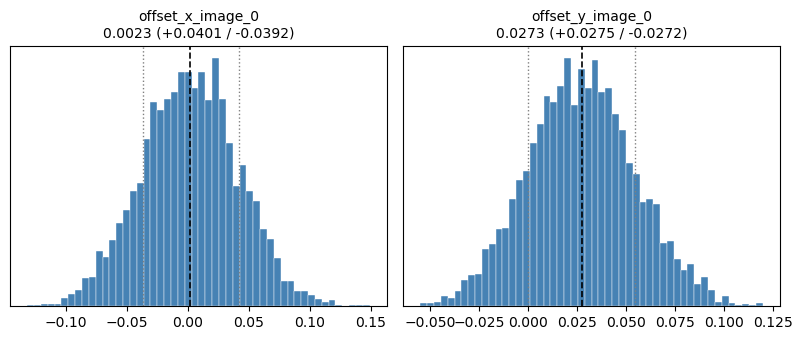

In [24]:
n = len(PARAMS_TO_PLOT)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 3.5))
if n == 1:
    axes = [axes]

for ax, name in zip(axes, PARAMS_TO_PLOT):
    if name not in param_names:
        ax.set_title(f"{name}\n(not found)")
        continue
    idx = param_names.index(name)
    vals = samples[:, idx]
    med = np.median(vals)
    lo, hi = np.percentile(vals, [16, 84])

    ax.hist(vals, bins=50, color="steelblue", edgecolor="white", linewidth=0.3)
    ax.axvline(med, color="k", ls="--", lw=1.2)
    ax.axvline(lo, color="grey", ls=":", lw=1)
    ax.axvline(hi, color="grey", ls=":", lw=1)
    ax.set_title(f"{name}\n{med:.4f} (+{hi - med:.4f} / -{med - lo:.4f})", fontsize=10)
    ax.set_yticks([])

fig.tight_layout()
plt.show()